<a href="https://colab.research.google.com/github/rudra1319/c_language/blob/main/forest_cover_type_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

forest cover type predictor for data scince

In [ ]:
# STEP 1: Import Libraries and Define Configuration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_covtype

# The 7 Forest Cover Types (Target Classes 1-7)
TARGET_NAMES = [
    'Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow',
    'Aspen', 'Douglas-fir', 'Krummholz'
]

print("✅ Libraries imported and configuration defined.")

✅ Libraries imported and configuration defined.


In [25]:
df = pd.read_csv('/content/covtype.csv.zip')

In [26]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,...,0,0,0,0,5
1,2590,56,2,212,-6,...,0,0,0,0,5
2,2804,139,9,268,65,...,0,0,0,0,2
3,2785,155,18,242,118,...,0,0,0,0,2
4,2595,45,2,153,-1,...,0,0,0,0,5


In [ ]:
# STEP 2: Data Acquisition and Splitting

def load_data():
    """Loads the dataset and performs the train-test split."""
    print("\n--- STEP 2: Data Acquisition and Splitting ---")

    # Data Acquisition: Fetch the large UCI Covertype dataset (581,012 samples).
    covertype_data = fetch_covtype(as_frame=True)
    X = covertype_data.data      # Features (54 columns)
    y = covertype_data.target    # Target (Cover_Type, 1-7)

    print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features.")

    # Data Splitting: 80% Train, 20% Test.
    # 'stratify=y' ensures balanced class representation in both sets (crucial due to class imbalance).
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Train/Test split: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples.")

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()


--- STEP 2: Data Acquisition and Splitting ---
Dataset loaded: 581012 samples, 54 features.
Train/Test split: 464809 training samples, 116203 testing samples.


In [ ]:
# STEP 3: Preprocessing (Standard Scaling)

def preprocess_data(X_train, X_test):
    """Applies Standard Scaling to the continuous numerical features."""
    print("\n--- STEP 3: Preprocessing (Standard Scaling) ---")

    # The first 10 features are continuous numerical variables (e.g., Elevation, Distance).
    # The remaining 44 features are binary (0/1 for Soil Type/Wilderness Area) and should not be scaled.
    numerical_features = X_train.columns[:10]

    scaler = StandardScaler()

    # 1. Fit and Transform on Training Data: Learns the mean and std dev from the training data.
    X_train_scaled = X_train.copy()
    X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])

    # 2. Transform ONLY on Test Data: Applies the learned parameters to the test set.
    # This prevents 'data leakage' from the test set into the training process.
    X_test_scaled = X_test.copy()
    X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

    print("Continuous features standardized (mean=0, std=1).")

    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)


--- STEP 3: Preprocessing (Standard Scaling) ---
Continuous features standardized (mean=0, std=1).


In [ ]:
# STEP 4: Model Training (Random Forest Classifier)

def train_model(X_train, y_train):
    """Initializes and trains the Random Forest model."""
    print("\n--- STEP 4: Model Training (Random Forest Classifier) ---")

    # Model Initialization:
    rf_model = RandomForestClassifier(
        n_estimators=100,      # Number of decision trees
        random_state=42,       # Seed for reproducibility
        n_jobs=-1,             # Use all available CPU cores
        max_depth=25           # Limit tree depth to prevent minor overfitting
    )

    print("Training the Random Forest model...")
    start_time = time.time()

    # Training
    rf_model.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"Training complete in {training_time:.2f} seconds.")

    return rf_model

rf_model = train_model(X_train_scaled, y_train)


--- STEP 4: Model Training (Random Forest Classifier) ---
Training the Random Forest model...
Training complete in 149.07 seconds.


In [ ]:
# STEP 5: Prediction and Evaluation (All Metrics)

def evaluate_model(model, X_test, y_test):
    """Generates predictions and calculates all classification metrics."""
    print("\n--- STEP 5: Prediction and Evaluation (All Metrics) ---")

    # Prediction
    y_pred = model.predict(X_test)

    # A. Overall Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Overall Model Accuracy: {accuracy*100:.4f}%")

    # B. Detailed Classification Report (Precision, Recall, F1-Score)
    print("\n📊 Detailed Classification Report (Metrics by Cover Type):")
    print(classification_report(y_test, y_pred, target_names=TARGET_NAMES, zero_division=0))

    return y_pred

y_pred = evaluate_model(rf_model, X_test_scaled, y_test)


--- STEP 5: Prediction and Evaluation (All Metrics) ---
✅ Overall Model Accuracy: 92.9374%

📊 Detailed Classification Report (Metrics by Cover Type):
                   precision    recall  f1-score   support

       Spruce/Fir       0.95      0.90      0.92     42368
   Lodgepole Pine       0.91      0.97      0.94     56661
   Ponderosa Pine       0.94      0.95      0.94      7151
Cottonwood/Willow       0.91      0.84      0.87       549
            Aspen       0.96      0.59      0.73      1899
      Douglas-fir       0.93      0.86      0.89      3473
        Krummholz       0.97      0.92      0.95      4102

         accuracy                           0.93    116203
        macro avg       0.94      0.86      0.89    116203
     weighted avg       0.93      0.93      0.93    116203




--- STEP 6A: Visualizing Confusion Matrix ---


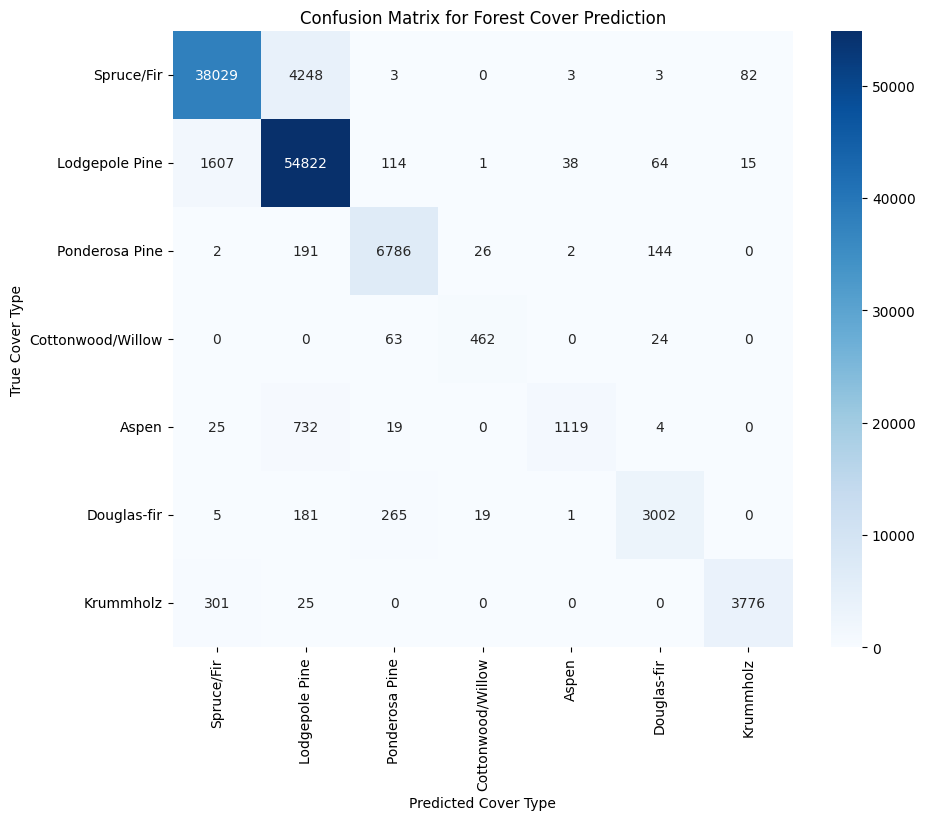


--- STEP 6B: Generating Accuracy Graph ---


In [ ]:
# STEP 6: Visualization

# A. Confusion Matrix Heatmap
def plot_confusion_matrix(y_true, y_pred):
    """Generates and plots the Confusion Matrix heatmap."""
    print("\n--- STEP 6A: Visualizing Confusion Matrix ---")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=True,
        xticklabels=TARGET_NAMES,
        yticklabels=TARGET_NAMES
    )
    plt.title('Confusion Matrix for Forest Cover Prediction')
    plt.ylabel('True Cover Type')
    plt.xlabel('Predicted Cover Type')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
#

# B. Accuracy Graph vs. Estimators
def plot_accuracy_vs_estimators(X_train, X_test, y_train, y_test):
    """Plots model accuracy as a function of the number of estimators (trees)."""
    print("\n--- STEP 6B: Generating Accuracy Graph ---")
    estimators = [5, 10, 25, 50, 75, 100, 150]
    accuracy_scores = []

    # Re-train models with varying n_estimators
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=25, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred_temp = rf.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred_temp))

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(estimators, accuracy_scores, marker='o', linestyle='--', color='green')
    plt.title('Random Forest Accuracy vs. Number of Estimators (Trees)')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Test Accuracy Score')
    plt.grid(True)
    plt.show()

plot_accuracy_vs_estimators(X_train_scaled, X_test_scaled, y_train, y_test)
#

# [Image of Line plot of accuracy score versus number of estimators in a random forest]